In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
DemocraticQualityData = pd.read_excel('../Data/HappinessData.xls', sheet_name = 'Table2.1', usecols="A,B,M")
DemocraticQualityData.head()

,country,year,Democratic Quality
0,Afghanistan,2008,-1.929690
1,Afghanistan,2009,-2.044093
2,Afghanistan,2010,-1.991810
3,Afghanistan,2011,-1.919018
4,Afghanistan,2012,-1.842996


In [5]:
# Get the more recent Democratic Quality score --> should we take the mean ?
DemocraticQualityData = DemocraticQualityData.sort_values('year', ascending=False)\
    .groupby("country").first()

In [6]:
DemocraticQualityData = DemocraticQualityData.drop('year', axis=1)
DemocraticQualityData.head()

,Democratic Quality
country,
Afghanistan,-1.917693
Albania,0.208456
Algeria,-1.008262
Angola,-0.739363
Argentina,0.381370


In [7]:
FIPS_codes = pd.read_csv('../Data/fips-country-codes.csv', usecols = ['Name', 'FIPS 10-4'])
FIPS_codes.head()

,FIPS 10-4,Name
0,AF,Afghanistan
1,AX,Akrotiri
2,AL,Albania
3,AG,Algeria
4,AQ,American Samoa


In [41]:
DemocraticQuality_byFIPS = DemocraticQualityData.merge(FIPS_codes, left_on='country', right_on='Name')
DemocraticQuality_byFIPS.head()

,Democratic Quality,FIPS 10-4,Name
0,-1.917693,AF,Afghanistan
1,0.208456,AL,Albania
2,-1.008262,AG,Algeria
3,-0.739363,AO,Angola
4,0.381370,AR,Argentina


In [42]:
DemocraticQuality_byFIPS['Democratic Quality'].describe()

count    154.000000
mean      -0.162913
std        0.881022
min       -2.448228
25%       -0.738842
50%       -0.249497
75%        0.571413
max        1.467140
Name: Democratic Quality, dtype: float64

In [43]:
# Split DemocraticQuality index into bins in order to group countries with similar index
DemocraticQuality_byFIPS['Democratic Quality binned']=pd.cut(DemocraticQuality_byFIPS['Democratic Quality'],\
                                                             bins = [-2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5])
DemocraticQuality_byFIPS.head()

,Democratic Quality,FIPS 10-4,Name,Democratic Quality binned
0,-1.917693,AF,Afghanistan,"(-2.0, -1.5]"
1,0.208456,AL,Albania,"(0.0, 0.5]"
2,-1.008262,AG,Algeria,"(-1.5, -1.0]"
3,-0.739363,AO,Angola,"(-1.0, -0.5]"
4,0.381370,AR,Argentina,"(0.0, 0.5]"


In [44]:
list_by_bin = DemocraticQuality_byFIPS.groupby('Democratic Quality binned')['FIPS 10-4'].apply(list)

binned_DemocraticQuality = pd.DataFrame(list_by_bin)
binned_DemocraticQuality = binned_DemocraticQuality.reset_index()
binned_DemocraticQuality = binned_DemocraticQuality.rename(index=str, columns={'FIPS 10-4':'FIPS'})
binned_DemocraticQuality = binned_DemocraticQuality.rename(index=str, columns={'Democratic Quality binned':'Democratic_Quality_binned'})

binned_DemocraticQuality.head()

,Democratic_Quality_binned,FIPS
0,"(-2.5, -2.0]","[SO, OD, SU, SY, YM]"
1,"(-2.0, -1.5]","[AF, ET, IZ, LY, PK]"
2,"(-1.5, -1.0]","[AG, AJ, BA, CT, CD, CH, EG, IR, LE, NI, RS, S..."
3,"(-1.0, -0.5]","[AO, AM, BG, BO, BY, CM, CU, DJ, GB, GV, HA, J..."
4,"(-0.5, 0.0]","[BL, BK, UV, CB, CO, CN, EC, GG, GT, GY, HO, I..."


In [45]:
binned_DemocraticQuality.to_csv('binned_DemocraticQuality_FIPS', header=False, index=False)

In [46]:
averageTone_FIPS = pd.read_csv('../Data/avgToneBySourceLocation_table.csv')
averageTone_FIPS.head()

,FIPS,AverageTone
0,IT,-1.226632
1,WA,-2.156439
2,CM,-2.944971
3,ML,-1.462604
4,MG,-0.242109


In [48]:
DemocraticQuality_AvgTone_byFIPS = DemocraticQuality_byFIPS.merge(averageTone_FIPS, left_on='FIPS 10-4', right_on='FIPS')\
    .drop(['FIPS 10-4'], axis=1)
DemocraticQuality_AvgTone_byFIPS.head()

,Democratic Quality,Name,Democratic Quality binned,FIPS,AverageTone
0,-1.917693,Afghanistan,"(-2.0, -1.5]",AF,-3.374755
1,0.208456,Albania,"(0.0, 0.5]",AL,-1.843297
2,-1.008262,Algeria,"(-1.5, -1.0]",AG,-2.045113
3,-0.739363,Angola,"(-1.0, -0.5]",AO,-1.026558
4,0.381370,Argentina,"(0.0, 0.5]",AR,-1.964747


In [50]:
DemocraticQuality_AvgTone_mean=DemocraticQuality_AvgTone_byFIPS.groupby('Democratic Quality binned')['AverageTone']\
    .apply(np.mean)
DemocraticQuality_AvgTone_mean.head()

Democratic Quality binned
(-2.5, -2.0]   -2.631084
(-2.0, -1.5]   -2.574403
(-1.5, -1.0]   -1.635941
(-1.0, -0.5]   -1.578045
(-0.5, 0.0]    -1.735919
Name: AverageTone, dtype: float64

Text(0, 0.5, 'Average Tone')

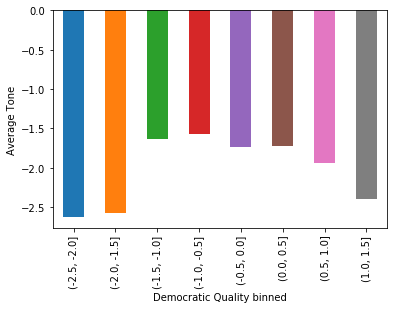

In [57]:
DemocraticQuality_AvgTone_mean.plot.bar()
plt.ylabel('Average Tone')

In [76]:
print('The Pearson correlation between Democratic Quality and Average Tone is : ')
print(DemocraticQuality_AvgTone_byFIPS['Democratic Quality'].corr(DemocraticQuality_AvgTone_byFIPS['AverageTone']))

The Pearson correlation between Democratic Quality and Average Tone is : 
-0.0769280980307341


In [59]:
# Observe for several EventRootCodes, the average tone in each country
avgTone_FIPS_EventRootCode = pd.read_csv('../Data/avgTone_FIPS_EventRootCode.csv')\
    .rename(index=str, columns={'f0_':'AvgTone'})
avgTone_FIPS_EventRootCode.head()

,FIPS,EventRootCode,AvgTone
0,TU,5,0.641469
1,JO,5,0.100875
2,SC,5,2.567115
3,GP,5,-0.572004
4,PC,5,-1.619279


In [61]:
# Try to find a link with the democratic index in the country
avgTone_EventRootCode_Demo = DemocraticQuality_byFIPS\
    .merge(avgTone_FIPS_EventRootCode, left_on='FIPS 10-4', right_on='FIPS')\
    .drop('FIPS 10-4', axis=1)
avgTone_EventRootCode_Demo.head()

,Democratic Quality,Name,Democratic Quality binned,FIPS,EventRootCode,AvgTone
0,-1.917693,Afghanistan,"(-2.0, -1.5]",AF,5,-0.896783
1,-1.917693,Afghanistan,"(-2.0, -1.5]",AF,6,-2.208447
2,-1.917693,Afghanistan,"(-2.0, -1.5]",AF,14,-5.137769
3,-1.917693,Afghanistan,"(-2.0, -1.5]",AF,15,-3.055255
4,-1.917693,Afghanistan,"(-2.0, -1.5]",AF,19,-6.547427


In [65]:
avgTone_EventRootCode_Demo_binned = avgTone_EventRootCode_Demo.groupby(['Democratic Quality binned', 'EventRootCode'])['AvgTone'].apply(np.mean)

avgTone_EventRootCode_Demo_binned = pd.DataFrame(avgTone_EventRootCode_Demo_binned)
avgTone_EventRootCode_Demo_binned.head()

AvgTone
Democratic Quality binned EventRootCode          
(-2.5, -2.0]              5             -0.710548
                          6             -2.314746
                          14            -4.368456
                          15            -3.113141
                          19            -5.463931

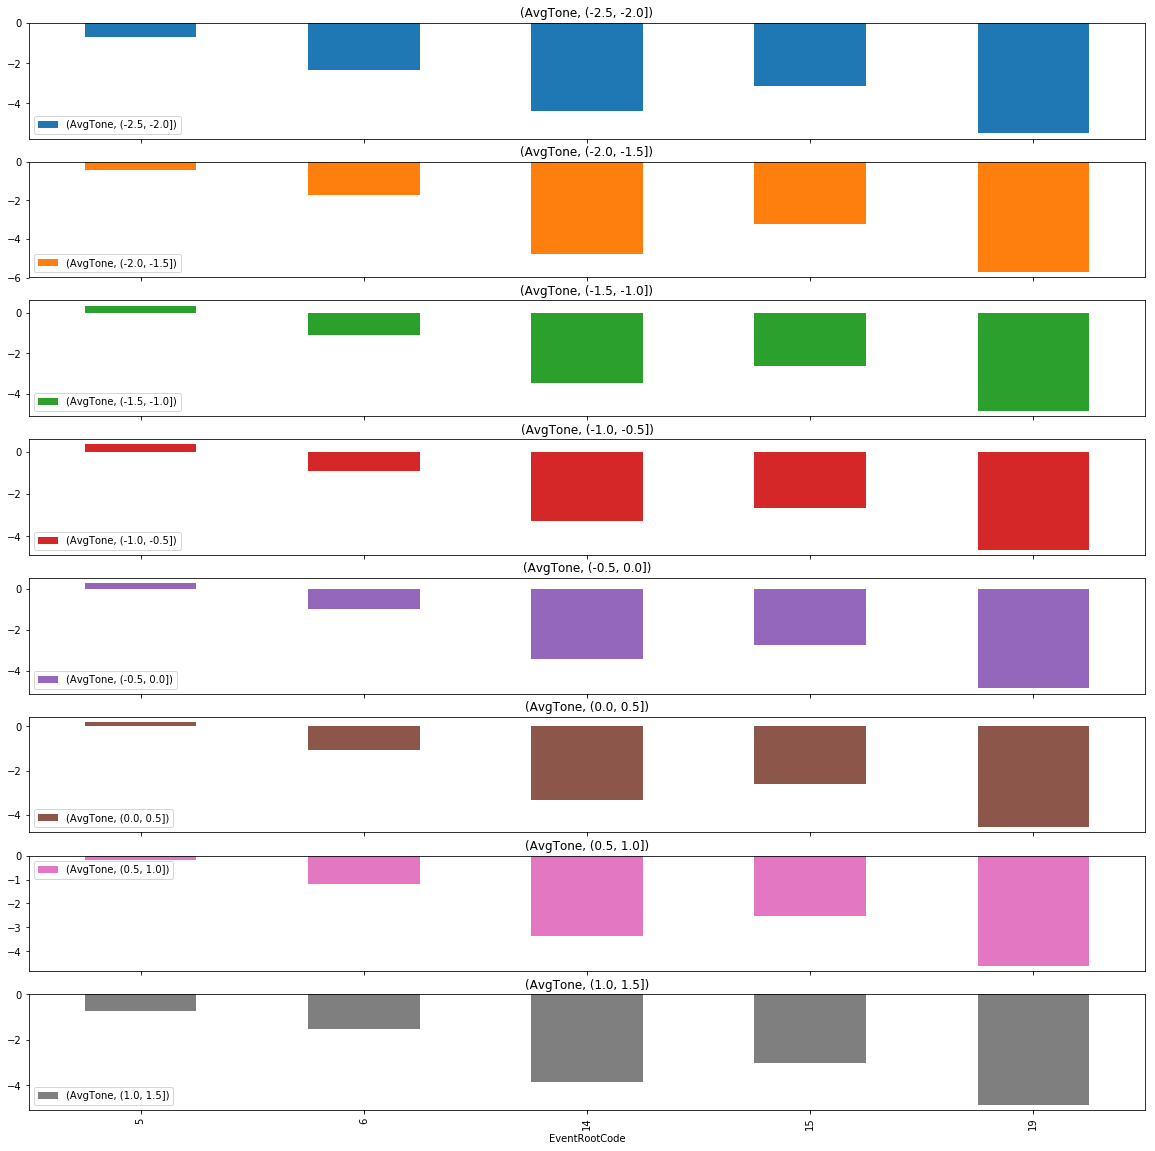

In [71]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

avgTone_EventRootCode_Demo_binned.unstack(level=0).plot(kind='bar', subplots=True)
fig = plt.gcf()
fig.savefig("democratic_event_avgTone.png")